In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import os.path

from sklearn import manifold
from numpy.linalg import svd
from scipy.spatial.distance import pdist
from numpy.linalg import norm

from scipy.stats import entropy

%matplotlib inline

In [2]:
def get_returns_df():
    """Load the data and calculate log return.  Remove the 
    first row because it will always be NaN."""
    df = pd.read_csv('./input/russell3000.csv')
    df.set_index(df['Dates'], inplace=True)
    df.drop('Dates', axis=1, inplace=True)
    df_ret = np.log(df / df.shift())
    df_ret.drop(['1/2/1986'], inplace=True)
    return df_ret

In [6]:
df = get_returns_df()
width = 60
i = 0
max_rows = df.shape[0] - (width + 1) 

In [7]:
data = df[i:i+width].copy()
orig_cols_len = len(data.columns)
data.dropna(axis=1, inplace=True)
new_cols_len = len(data.columns)
ds = df.index[i+width]

In [37]:
temp_data = data.copy()
row_mean = data.mean(axis=1)
row_var = data.var(axis=1)

num_cols = len(data.columns)
temp_data = data.sub(row_mean, axis=0)
temp_data = np.square(temp_data)
temp_data = temp_data.div(row_var, axis=0)
temp_data = np.exp(-1*temp_data)
temp_data.head()

pr = temp_data/num_cols

# sum_temp_data = temp_data.sum(axis=1)/num_cols
# sum_temp_data.head()

In [50]:
def get_kl_matrix(df):
    rows = len(df)
    kl = np.zeros((rows, rows))
    
    for i in range(0, rows):
        for j in range(0, rows):
            kl[i,j] = entropy(df.ix[i], df.ix[j])
            
    return kl

In [52]:
kl = get_kl_matrix(pr)

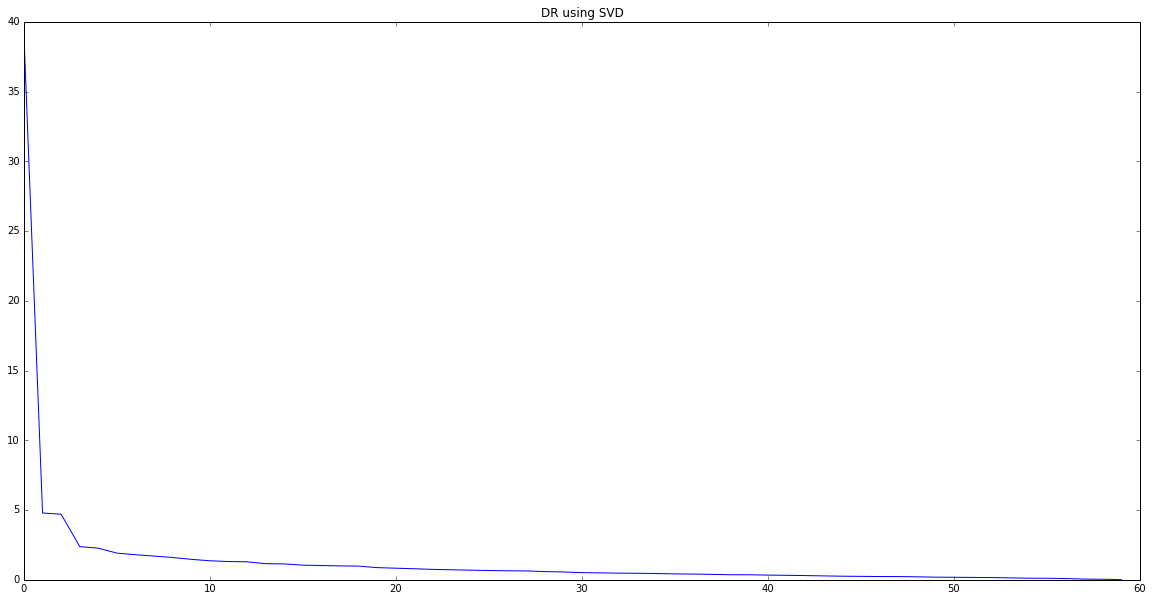

In [54]:
U, s_svd, V = np.linalg.svd(kl, full_matrices=False)
plt.figure(figsize=(20,10))
plt.title('DR using SVD')
plt.plot(s_svd)

In [ ]:
# for i in range(0, max_rows):
#     data = df[i:i+width].copy()
#     orig_cols_len = len(data.columns)
#     data.dropna(axis=1, inplace=True)
#     new_cols_len = len(data.columns)
#     ds = df.index[i+width]
#     get_kl_matrix(data)
#     break